## Simulación de venta de articulos

In [73]:
from scipy.stats import norm
from scipy.stats import randint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [74]:
# parámetros del modelo
media_precio = 100
desv_est_precio = 10
min_unids = 10000
max_unids = 20000


#generación de precios y unids
n_exps = 10000
precios = norm.rvs(loc=media_precio, scale=desv_est_precio, size=n_exps)
unids = randint.rvs(min_unids, max_unids, size=n_exps)#Uniformes


In [75]:
# ventas 
ingresos = pd.DataFrame()

lista_ingresos = []
for i in range(n_exps):
    lista_ingresos.append( precios[i]*unids[i])
    
ingresos["ingresos"] = lista_ingresos
ingresos.head()


,ingresos
0,1.130593e+06
1,1.543915e+06
2,1.254891e+06
3,1.704136e+06
4,1.518269e+06


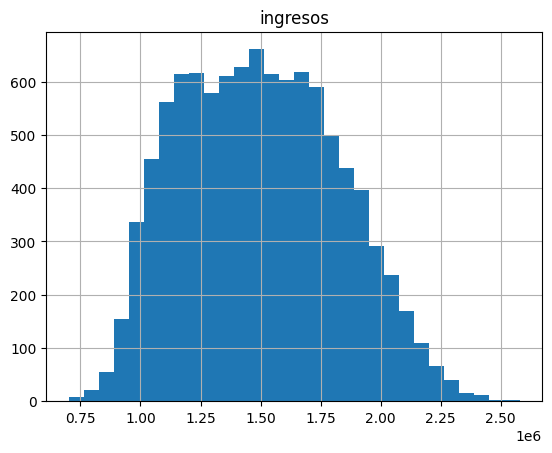

In [76]:
ingresos.hist(bins=30)
plt.show()


In [77]:
ingresos.describe()

,ingresos
count,1.000000e+04
mean,1.498365e+06
std,3.275842e+05
min,7.008928e+05
25%,1.231312e+06
50%,1.485928e+06
75%,1.740419e+06
max,2.578376e+06


In [78]:
import numpy as np
import scipy.stats as st
import math

# intervalo de confianza para la media
st.t.interval(confidence=0.95, df=len(ingresos)-1,
              loc=ingresos["ingresos"].mean(),
              scale=ingresos["ingresos"].std()/math.sqrt(len(ingresos)))



(1491943.2707286351, 1504785.8919114862)

In [79]:
# intervalo de confianza para la variable aleatoria
st.t.interval(confidence=0.95, df=len(ingresos)-1,
              loc=ingresos["ingresos"].mean(),
              scale=ingresos["ingresos"].std())

(856233.5221775107, 2140495.640462611)

## Taller en clase

       ingresos
0  1.130593e+06
1  1.543915e+06
2  1.254891e+06
3  1.704136e+06
4  1.518269e+06


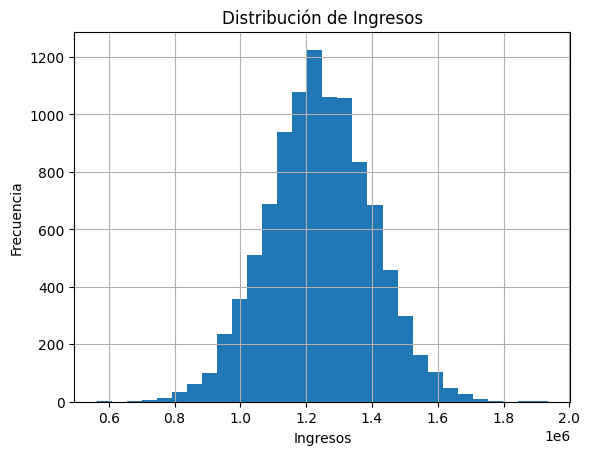

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, randint

# Parámetros del modelo
media_precio = 80  # Media del precio
desv_est_precio = 10  # Desviación estándar del precio
min_unids = 15000  # Cantidad mínima de unidades
max_unids = 16000  # Cantidad máxima de unidades

# Generación de precios y unidades
n_exps = 10000
precios = norm.rvs(loc=media_precio, scale=desv_est_precio, size=n_exps)
unids = randint.rvs(min_unids, max_unids, size=n_exps)

# Cálculo de ingresos
ingresos_2 = pd.DataFrame()

lista_ingresos = []
for i in range(n_exps):
    lista_ingresos.append(precios[i] * unids[i])

ingresos_2["ingresos"] = lista_ingresos

# Mostrar los primeros registros de ingresos
print(ingresos.head())

# Histograma de ingresos
ingresos_2.hist(bins=30)
plt.xlabel("Ingresos")
plt.ylabel("Frecuencia")
plt.title("Distribución de Ingresos")
plt.show()


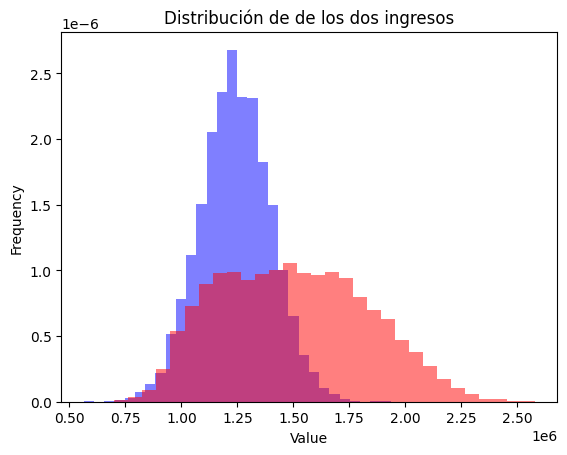

In [81]:
fig, ax = plt.subplots()

ax.hist(ingresos_2, bins=30, density=True,color="blue",label="Ingresos_2",alpha=0.5)
ax.hist(ingresos, bins=30, density=True,color="red",label="Ingresos",alpha=0.5)

ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Distribución de de los dos ingresos")
plt.show()

## Prueba de Medias

#### Prueba t-tes

In [84]:
import scipy.stats as stats
mean_ingresos = ingresos["ingresos"].mean()
mean_ingresos_2 = ingresos_2["ingresos"].mean()


t_stat, p_value = stats.ttest_ind(ingresos, ingresos_2)
print("t_stat: ", t_stat)
print("p_value: ", p_value)
if p_value < 0.05:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

#Calculemos un intervalo al 95 pociento
alfa = 0.05
conf_interval=stats.t.interval(1-alfa,len(ingresos)-1, loc=mean_ingresos, scale=stats.sem(ingresos))
print(conf_interval, " es el intervalo de confianza para los ingresos_1")

conf_interval_2=stats.t.interval(1-alfa,len(ingresos_2)-1, loc=mean_ingresos_2, scale=stats.sem(ingresos_2))
print(conf_interval_2, " es el intervalo de confianza para los ingresos_2")




t_stat:  [70.73248498]
p_value:  [0.]
Rechazamos la hipótesis nula
(array([1491943.27072864]), array([1504785.89191149]))  es el intervalo de confianza para los ingresos_1
(array([1238459.21626762]), array([1244600.07283699]))  es el intervalo de confianza para los ingresos_2


In [82]:
ingresos["ingresos"].describe()

count    1.000000e+04
mean     1.498365e+06
std      3.275842e+05
min      7.008928e+05
25%      1.231312e+06
50%      1.485928e+06
75%      1.740419e+06
max      2.578376e+06
Name: ingresos, dtype: float64

In [83]:
ingresos_2["ingresos"].describe()

count    1.000000e+04
mean     1.241530e+06
std      1.566384e+05
min      5.640134e+05
25%      1.137629e+06
50%      1.240381e+06
75%      1.347098e+06
max      1.934832e+06
Name: ingresos, dtype: float64

(array([ 14.,  37.,  61., 116., 154., 174., 244., 301., 295., 393., 466.,
        505., 475., 483., 591., 541., 567., 538., 529., 517., 536., 511.,
        421., 408., 333., 289., 226., 152.,  91.,  32.]),
 array([0.03391758, 0.06550721, 0.09709684, 0.12868646, 0.16027609,
        0.19186572, 0.22345535, 0.25504497, 0.2866346 , 0.31822423,
        0.34981386, 0.38140349, 0.41299311, 0.44458274, 0.47617237,
        0.507762  , 0.53935162, 0.57094125, 0.60253088, 0.63412051,
        0.66571013, 0.69729976, 0.72888939, 0.76047902, 0.79206865,
        0.82365827, 0.8552479 , 0.88683753, 0.91842716, 0.95001678,
        0.98160641]),
 <BarContainer object of 30 artists>)

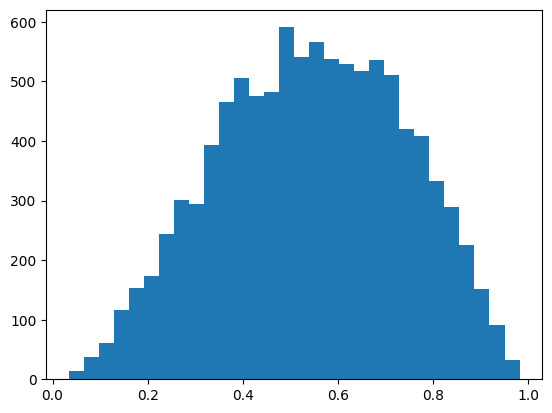

In [40]:
from scipy.stats import beta
import random
import matplotlib.pyplot as plt
import numpy as np

# Parameters for the Beta distribution
a = 3
b = 2.5
size = 10000

min_value = 0.17
max_value = 0.41
size = 10000

# Create a list to store the 10,000 random values
beta_values = beta.rvs(a, b, loc=min_value, scale=(max_value - min_value), size=size)
# Print the first few values


plt.hist(saturacion_values, bins=30)

### Petrolero

In [104]:
import numpy as np

# Número de simulaciones Montecarlo
num_simulaciones = 10000

# Genera variables aleatorias para cada parámetro
A_values = 805 # Área del campo en acres (rango entre 80 y 120)
H_values = np.random.uniform(162, 407, num_simulaciones)   # Espesor de interés en pies (rango entre 40 y 60) # si esta
porosidad_values = np.random.uniform(0.26, 0.27, num_simulaciones)  # Porosidad efectiva (rango entre 0.15 y 0.25) # Esta
saturacion_values = beta.ppf([0.17,0.29,0.41]a=3,b=2.5,0.17, 0.41, num_simulaciones)  # Saturación de agua (rango entre 0.25 y 0.35) # Si esta#saturacion
Boi_values = np.random.uniform(0.1,0.2, num_simulaciones)  # Factor volumétrico inicial del petróleo (rango entre 1.0 y 1.5)

# Inicializa un arreglo para almacenar los resultados
POES_values = np.zeros(num_simulaciones)

# Realiza las simulaciones Montecarlo
for i in range(num_simulaciones):
    POES = 7758 * A_values * H_values[i] * porosidad_values[i] * (1 - saturacion_values[i]) / Boi_values[i]
    POES_values[i] = POES

# Calcula estadísticas de los resultados
media_POES = np.mean(POES_values)
desviacion_estandar_POES = np.std(POES_values)

# Imprime resultados
print("Media de POES:", media_POES, "bbl")
print("Desviación Estándar de POES:", desviacion_estandar_POES, "bbl")


Media de POES: 2592058426.6423182 bbl
Desviación Estándar de POES: 932100933.604976 bbl


(array([ 51., 211., 455., 637., 751., 795., 828., 817., 822., 748., 658.,
        599., 536., 445., 355., 305., 241., 179., 142., 118.,  85.,  75.,
         45.,  36.,  29.,  20.,   6.,   7.,   2.,   2.]),
 array([8.27352560e+08, 1.01838363e+09, 1.20941470e+09, 1.40044577e+09,
        1.59147684e+09, 1.78250791e+09, 1.97353898e+09, 2.16457005e+09,
        2.35560112e+09, 2.54663219e+09, 2.73766326e+09, 2.92869433e+09,
        3.11972540e+09, 3.31075647e+09, 3.50178754e+09, 3.69281861e+09,
        3.88384968e+09, 4.07488075e+09, 4.26591182e+09, 4.45694289e+09,
        4.64797396e+09, 4.83900503e+09, 5.03003610e+09, 5.22106717e+09,
        5.41209824e+09, 5.60312931e+09, 5.79416038e+09, 5.98519145e+09,
        6.17622252e+09, 6.36725359e+09, 6.55828466e+09]),
 <BarContainer object of 30 artists>)

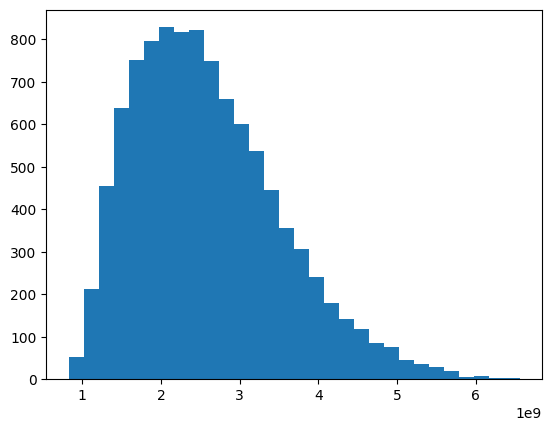

In [105]:
plt.hist(POES_values, bins=30)

In [107]:
POES_values=pd.DataFrame(POES_values)
POES_values.describe()

,0
count,1.000000e+04
mean,2.592058e+09
std,9.321475e+08
min,8.273526e+08
25%,1.883342e+09
50%,2.451916e+09
75%,3.154254e+09
max,6.558285e+09


## Media intervalo

In [108]:
import scipy.stats as st
import math

st.t.interval(confidence=0.95, df=len(POES_values)-1,loc=POES_values.mean(),scale=POES_values.std()/math.sqrt(len(POES_values)))

(array([2.57378646e+09]), array([2.61033039e+09]))

In [110]:

percentil_10=POES_values.quantile(0.1)
percentil_90=POES_values.quantile(0.9)
print("El percentil 10 es: ", percentil_10)
print("El percentil 90 es: ", percentil_90)
 

El percentil 10 es:  0    1.495934e+09
Name: 0.1, dtype: float64
El percentil 90 es:  0    3.870998e+09
Name: 0.9, dtype: float64


## Punto 4


(array([ 51., 211., 455., 637., 751., 795., 828., 817., 822., 748., 658.,
        599., 536., 445., 355., 305., 241., 179., 142., 118.,  85.,  75.,
         45.,  36.,  29.,  20.,   6.,   7.,   2.,   2.]),
 array([8.27352560e+08, 1.01838363e+09, 1.20941470e+09, 1.40044577e+09,
        1.59147684e+09, 1.78250791e+09, 1.97353898e+09, 2.16457005e+09,
        2.35560112e+09, 2.54663219e+09, 2.73766326e+09, 2.92869433e+09,
        3.11972540e+09, 3.31075647e+09, 3.50178754e+09, 3.69281861e+09,
        3.88384968e+09, 4.07488075e+09, 4.26591182e+09, 4.45694289e+09,
        4.64797396e+09, 4.83900503e+09, 5.03003610e+09, 5.22106717e+09,
        5.41209824e+09, 5.60312931e+09, 5.79416038e+09, 5.98519145e+09,
        6.17622252e+09, 6.36725359e+09, 6.55828466e+09]),
 <BarContainer object of 30 artists>)

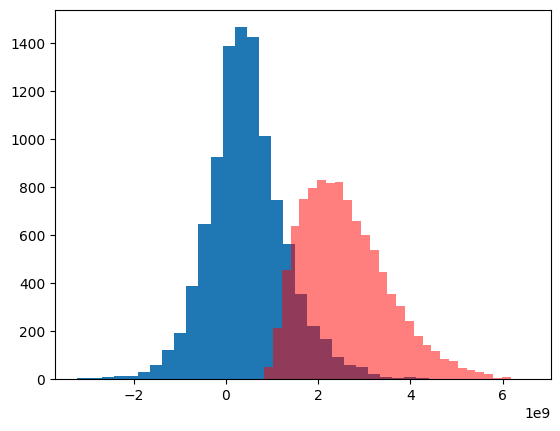

In [129]:
Rf=norm.rvs(loc=0.17,scale=0.3,size=10000)
Rf=pd.DataFrame(Rf)


Reservas=Rf*POES_values

plt.hist(Reservas, bins=30)
plt.hist(POES_values, bins=30,color="red",alpha=0.5)

In [126]:
Reservas.describe()

,0
count,1.000000e+04
mean,4.379255e+08
std,8.361918e+08
min,-3.372877e+09
25%,-6.299170e+07
50%,3.945699e+08
75%,8.949972e+08
max,5.610294e+09


In [127]:
st.t.interval(confidence=0.95, df=len(Reservas)-1,loc=Reservas.mean(),scale=Reservas.std()/math.sqrt(len(Reservas)))

(array([4.21534502e+08]), array([4.54316587e+08]))